In [127]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import matplotlib.pyplot as plt

## 1 生成数据集并展示

In [128]:
n_train, n_test, num_inputs = 7000, 3000, 500
true_w, true_b = torch.ones(num_inputs, 1) * 0.0056, 0.028

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 2 读取数据

In [129]:
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,  num_workers=0)

In [130]:
for X, y in train_iter:
    print(X, y)
    break

tensor([[ 1.0306,  0.9773, -0.0390,  ..., -1.2051,  1.1046,  0.5865],
        [-0.0919,  0.2904, -0.2090,  ...,  0.1742, -0.0363,  0.0516],
        [ 0.1198, -0.4174,  0.0890,  ..., -0.1635, -1.3321, -0.7688],
        ...,
        [-1.0002,  1.2684,  0.1392,  ...,  2.3436, -0.4502,  0.5915],
        [-1.6921, -0.2411,  0.8576,  ..., -1.3360,  0.2961,  1.0609],
        [ 0.4976,  0.1039,  0.7994,  ..., -1.3619,  1.8979,  0.4361]]) tensor([[-0.1639],
        [-0.0861],
        [-0.1239],
        [ 0.0936],
        [ 0.1739],
        [ 0.1558],
        [ 0.1539],
        [ 0.0521],
        [ 0.0215],
        [ 0.1725],
        [ 0.0813],
        [ 0.2057],
        [ 0.0561],
        [-0.0130],
        [-0.1747],
        [-0.1336],
        [ 0.1232],
        [ 0.0344],
        [-0.0911],
        [ 0.1759],
        [-0.0306],
        [-0.1504],
        [ 0.0477],
        [ 0.2128],
        [-0.1059],
        [-0.1524],
        [-0.0017],
        [ 0.1174],
        [-0.0907],
        [ 0.101

## 4 定义模型

In [131]:
num_inputs, num_outputs, num_hiddens = 500, 1, 200

net = nn.Sequential(
    nn.Linear(num_inputs, num_hiddens),
    #nn.ReLU(),
    nn.Linear(num_hiddens, num_outputs),
)
#初始化参数
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

## 5 定义损失函数

In [132]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 6 定义优化算法

In [133]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

## 7 定义loss画图函数

In [134]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

## 8 训练模型

In [135]:
def train(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            # 反向传播 + 更新优化参数
            l.backward()
            if optimizer == None:
                SGD(params, lr)
            else:
                optimizer.step()
            
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])

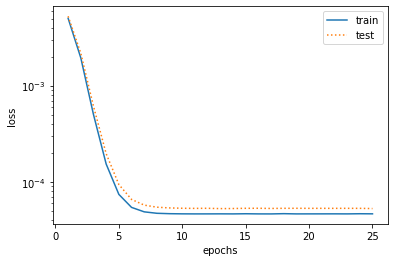

In [136]:
num_epochs = 25
train(net, train_iter, test_iter, squared_loss, num_epochs, batch_size, None, None, optimizer)